<a href="https://colab.research.google.com/github/saikiran101/Basic_understanding_of_Data-sciense-/blob/main/sales_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sale Analysis

**Data Wrangling**<br/>
->Load the Dataset <br/>
->Converting datatypes<br/>
->Cleaning the data if there are any null values in the column

In [84]:
import pandas as pd
df=pd.read_csv('/content/AusApparalSales4thQrt2020.csv')
df

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500


**Checking the data type**

In [71]:
df.dtypes

Date     object
Time     object
State    object
Group    object
Unit      int64
Sales     int64
dtype: object

In [72]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Check for missing values
print(df.isna().sum())


Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


**Data Analysis**

In [73]:
# Descriptive statistics
print(df[['Unit', 'Sales']].describe())

# Group with the highest and lowest sales
highest_sales_group = df.loc[df['Sales'].idxmax(), 'Group']
lowest_sales_group = df.loc[df['Sales'].idxmin(), 'Group']

print(f"Highest sales group: {highest_sales_group}")
print(f"Lowest sales group: {lowest_sales_group}")

              Unit          Sales
count  7560.000000    7560.000000
mean     18.005423   45013.558201
std      12.901403   32253.506944
min       2.000000    5000.000000
25%       8.000000   20000.000000
50%      14.000000   35000.000000
75%      26.000000   65000.000000
max      65.000000  162500.000000
Highest sales group:  Seniors
Lowest sales group:  Men


In [74]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


**Data Visualization**


For constructing a comprehensive dashboard that includes state-wise and group-wise sales analysis, as well as time-of-the-day analysis, I recommend using Seaborn in combination with Matplotlib. <br/>

Here,

**Seaborn** is built on top of Matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics.<br/>
**Matplotlib** offers extensive customization options, which is useful for tweaking the dashboard to your exact specifications.

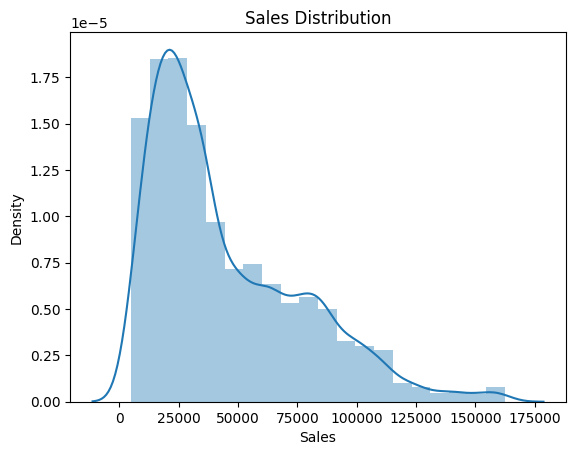

In [75]:
# Distribution plot for the 'Sales' column
sns.distplot(df['Sales'], bins=20)
plt.title('Sales Distribution')
plt.show()


**State-wise Sales Analysis**

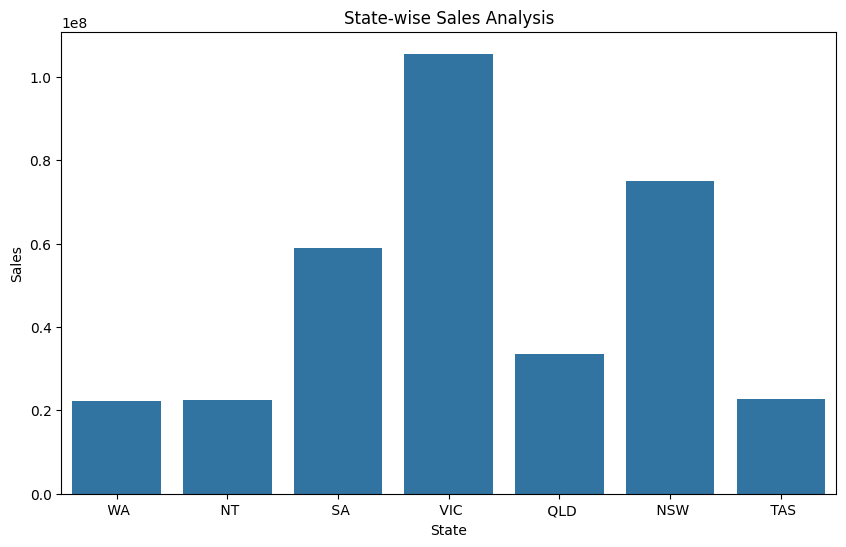

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Sales', data=df, estimator=sum, ci=None)
plt.title('State-wise Sales Analysis')
plt.show()

**Group-wise Sales Analysis Across Various States**

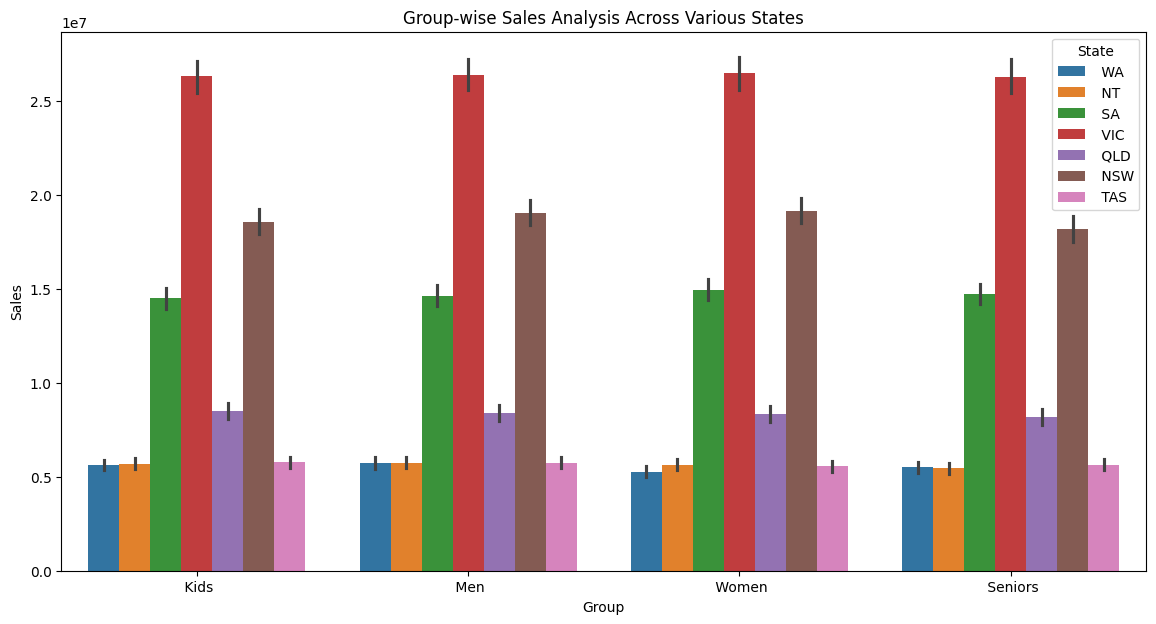

In [77]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Group', y='Sales', hue='State', data=df, estimator=sum)
plt.title('Group-wise Sales Analysis Across Various States')
plt.show()


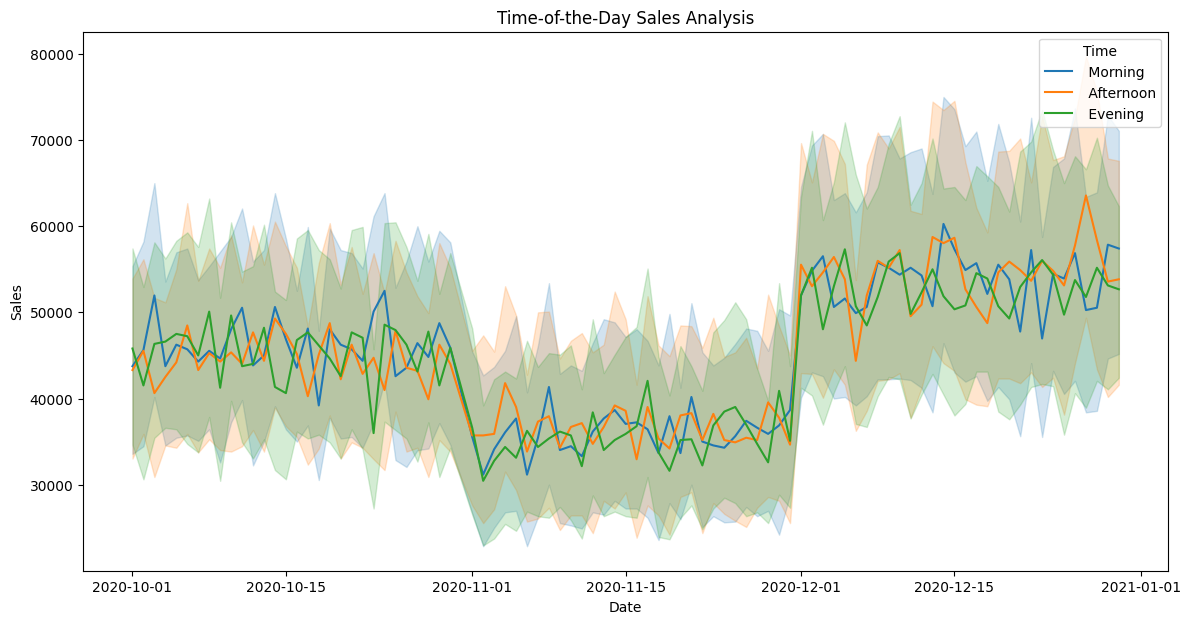

In [78]:
# Time-of-the-Day Analysis
# Assuming 'Time' column has categories like 'Morning', 'Afternoon', etc.
plt.figure(figsize=(14, 7))

sns.lineplot(x='Date', y='Sales', hue='Time', data=df)
plt.title('Time-of-the-Day Sales Analysis')
plt.show()

**For daily chart we need to resample your data accordingly**

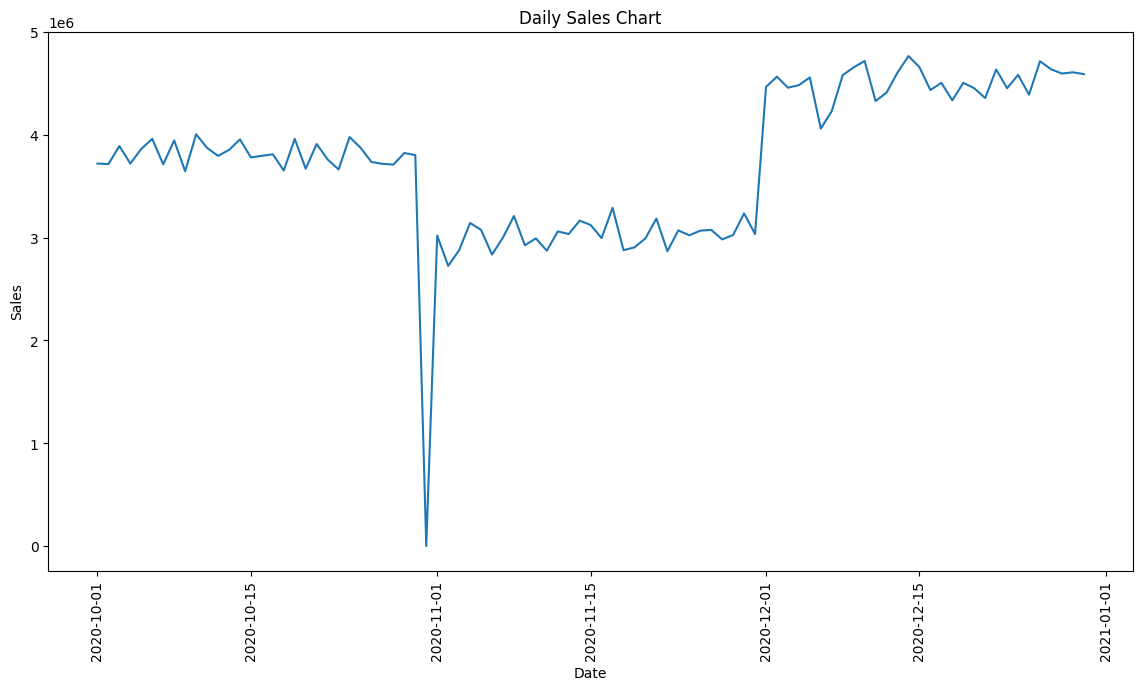

In [79]:
# For daily, weekly, monthly, and quarterly charts, you would need to resample your data accordingly

df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(14, 7))
daily = df.resample('D', on='Date').sum()
sns.lineplot(x=daily.index, y='Sales', data=daily)
plt.xticks(rotation=90)
plt.title('Daily Sales Chart')
plt.show()

**For weekly chart we need to resample your data accordingly**

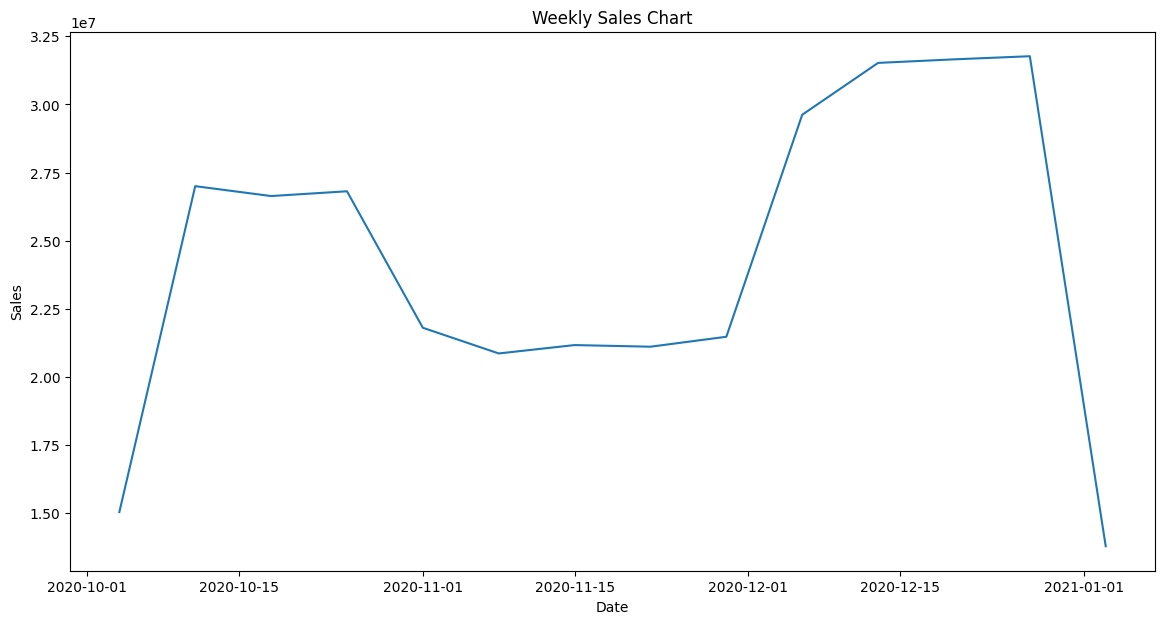

In [80]:
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(14, 7))
weekly = df.resample('W', on='Date').sum()
sns.lineplot(x=weekly.index, y='Sales', data=weekly)
plt.title('Weekly Sales Chart')
plt.show()

**For Monthly chart we need to resample your data accordingly**

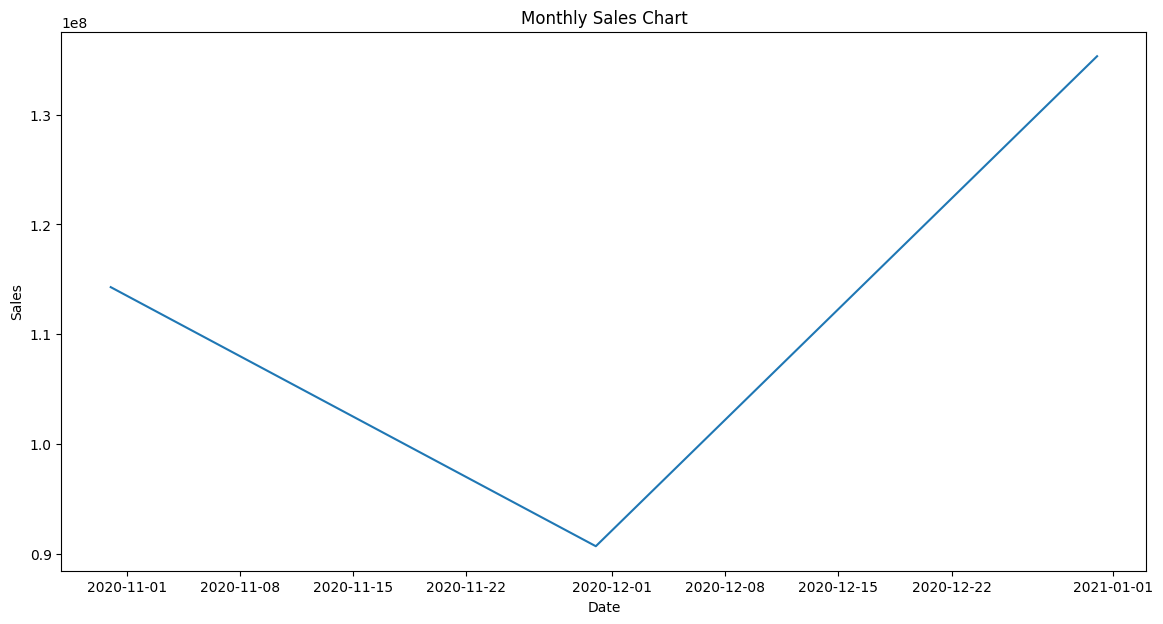

In [81]:
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(14, 7))
monthly = df.resample('M', on='Date').sum()
sns.lineplot(x=monthly.index, y='Sales', data=monthly)
plt.title('Monthly Sales Chart')
plt.show()

**For Quaterly chart we need to resample your data accordingly**

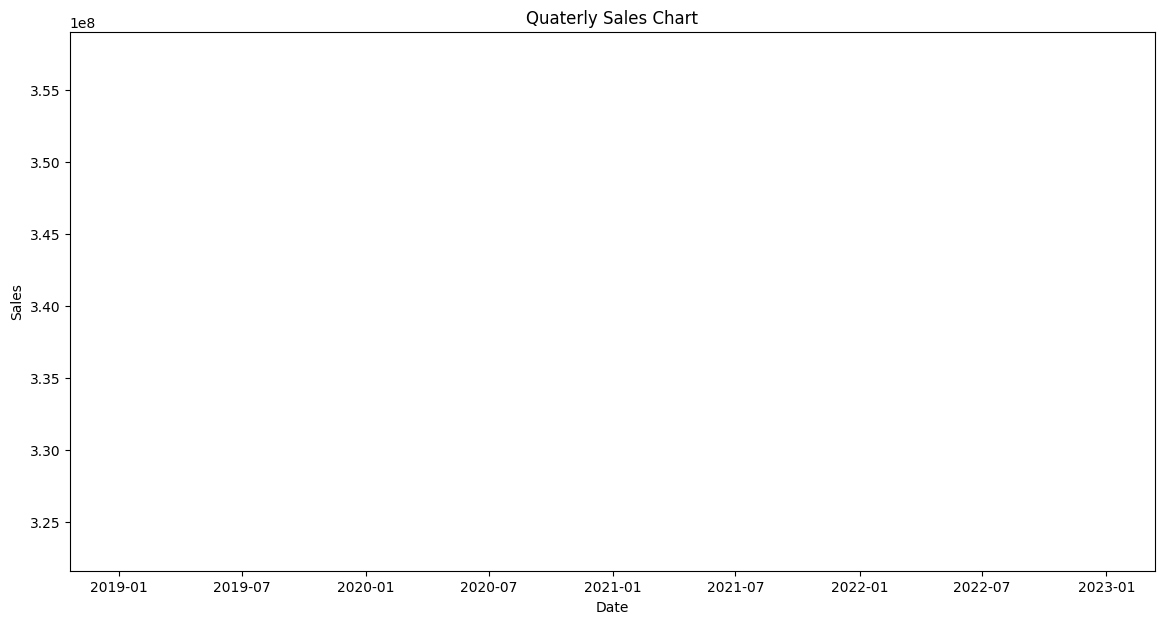

In [82]:
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(14, 7))
weekly_data = df.resample('Q', on='Date').sum()
sns.lineplot(x=weekly_data.index, y='Sales', data=weekly_data)
plt.title('Quaterly Sales Chart')
plt.show()